In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [150]:
# Read Data
data1 = pd.read_csv("California_Housing_Data_Part1.csv")
print(data1.head(5))

   housing_median_age  total_rooms  population  households  median_income  \
0                  41          880         322         126         8.3252   
1                  21         7099        2401        1138         8.3014   
2                  52         1467         496         177         7.2574   
3                  52         1274         558         219         5.6431   
4                  52         1627         565         259         3.8462   

   median_house_value  
0              452600  
1              358500  
2              352100  
3              341300  
4              342200  


In [151]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1[data1.columns] = scaler.fit_transform(data1[data1.columns])
print(data1.head(5))


   housing_median_age  total_rooms  population  households  median_income  \
0            0.264629    -0.731594   -0.900496   -0.918237       2.475571   
1           -1.255141     2.290488    1.185592    1.850507       2.462429   
2            1.100502    -0.446345   -0.725903   -0.778705       1.885958   
3            1.100502    -0.540132   -0.663691   -0.663797       0.994580   
4            1.100502    -0.368594   -0.656668   -0.554361       0.002376   

   median_house_value  
0            2.730352  
1            1.673476  
2            1.601595  
3            1.480296  
4            1.490404  


In [152]:
# About 300 random indices were chosen
indices = random.sample(range(len(data1)), 300)

# Indices were utilized to replace values with NaN
data1.loc[indices, 'median_house_value'] = np.nan

# Check Null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  999 non-null    float64
 1   total_rooms         999 non-null    float64
 2   population          999 non-null    float64
 3   households          999 non-null    float64
 4   median_income       999 non-null    float64
 5   median_house_value  699 non-null    float64
dtypes: float64(6)
memory usage: 47.0 KB


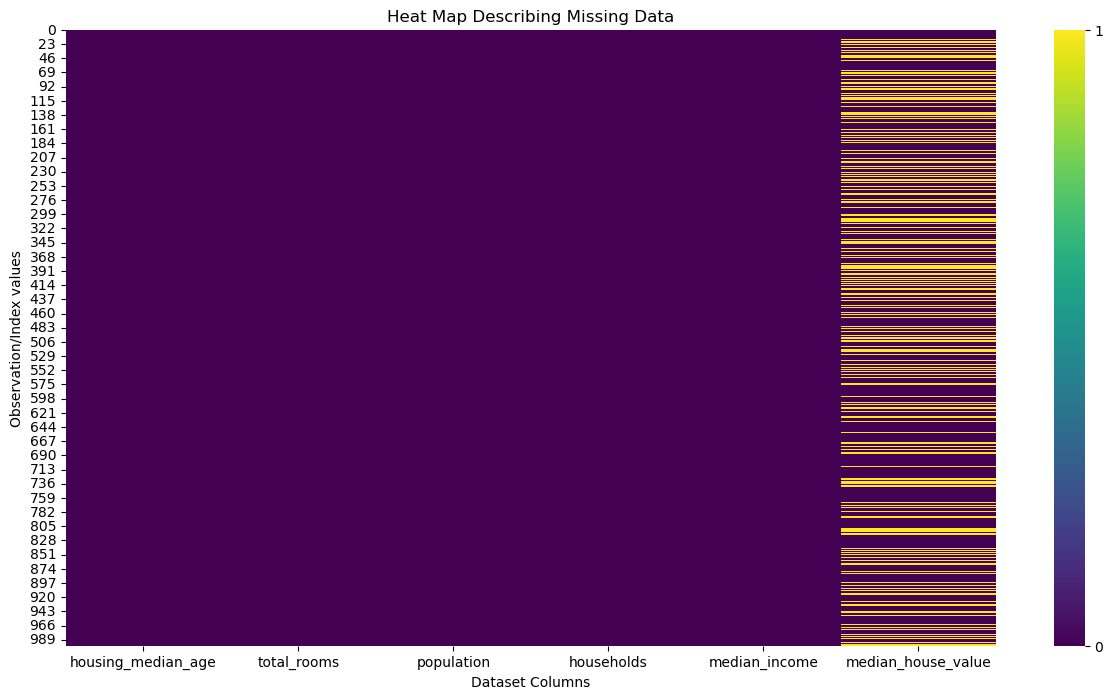

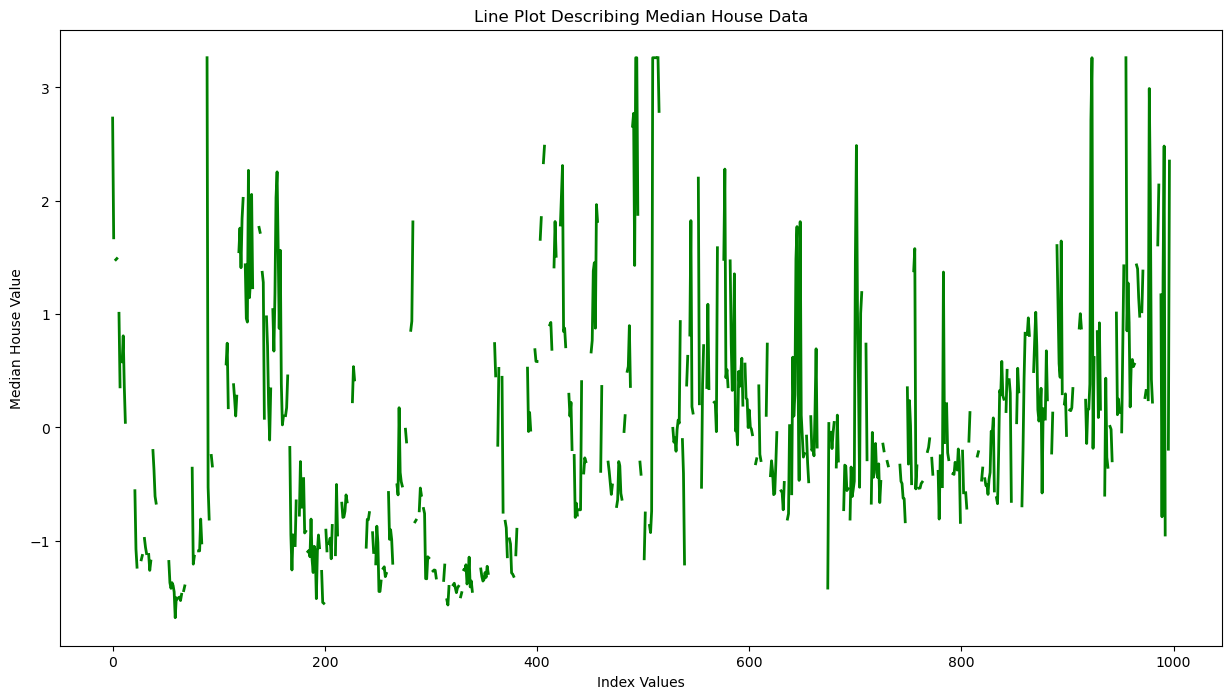

In [153]:
# Visualization - Before Imputation

# Bar Plot for Missing Values in each column
plt.figure(figsize=(15, 8))

sns.heatmap(data1.isnull(), cmap='viridis', cbar_kws={'ticks': [0, 1]}, vmin=0, vmax=1)
plt.title('Heat Map Describing Missing Data')
plt.xlabel('Dataset Columns')
plt.ylabel('Observation/Index values')
plt.show()

# Line Plot for Missing Values Column
plt.figure(figsize=(15, 8))
plt.plot(data1['median_house_value'], label='Median House Value', linewidth=2, color = 'Green')
plt.xlabel('Index Values')
plt.ylabel('Median House Value')
plt.title('Line Plot Describing Median House Data')
plt.show()

In [154]:
# Iterative Imputer from Scikit-learn
from sklearn.impute import IterativeImputer

# Setup the Imputer and perform Imputation
imputer = IterativeImputer()
data1[data1.columns] = imputer.fit_transform(data1[data1.columns])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  999 non-null    float64
 1   total_rooms         999 non-null    float64
 2   population          999 non-null    float64
 3   households          999 non-null    float64
 4   median_income       999 non-null    float64
 5   median_house_value  999 non-null    float64
dtypes: float64(6)
memory usage: 47.0 KB


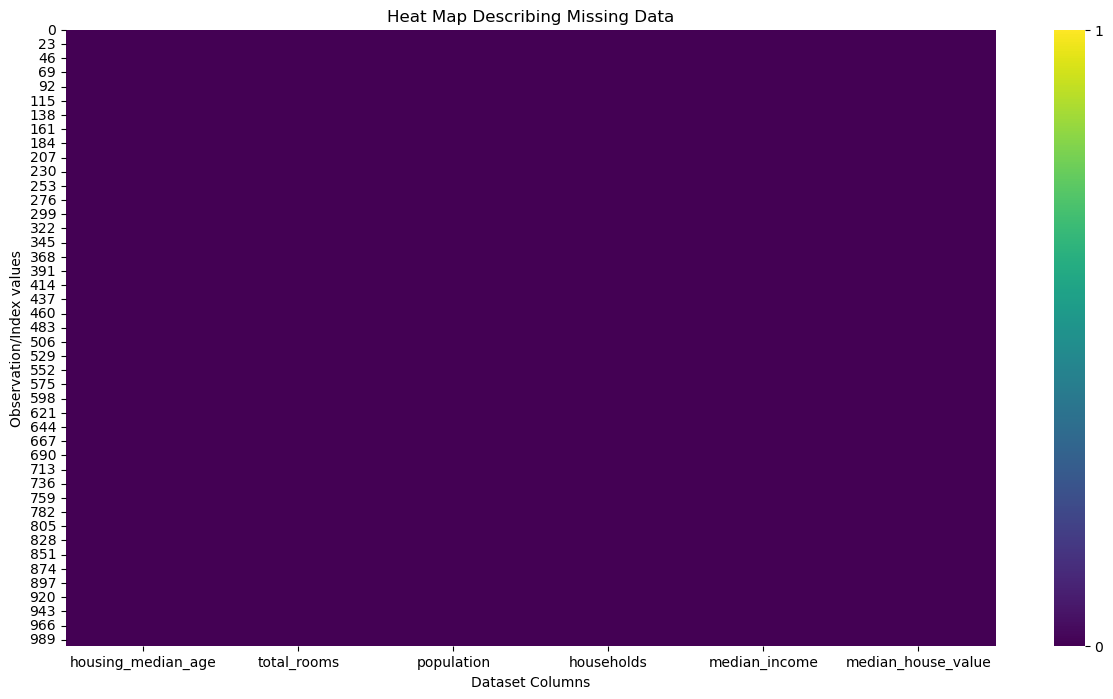

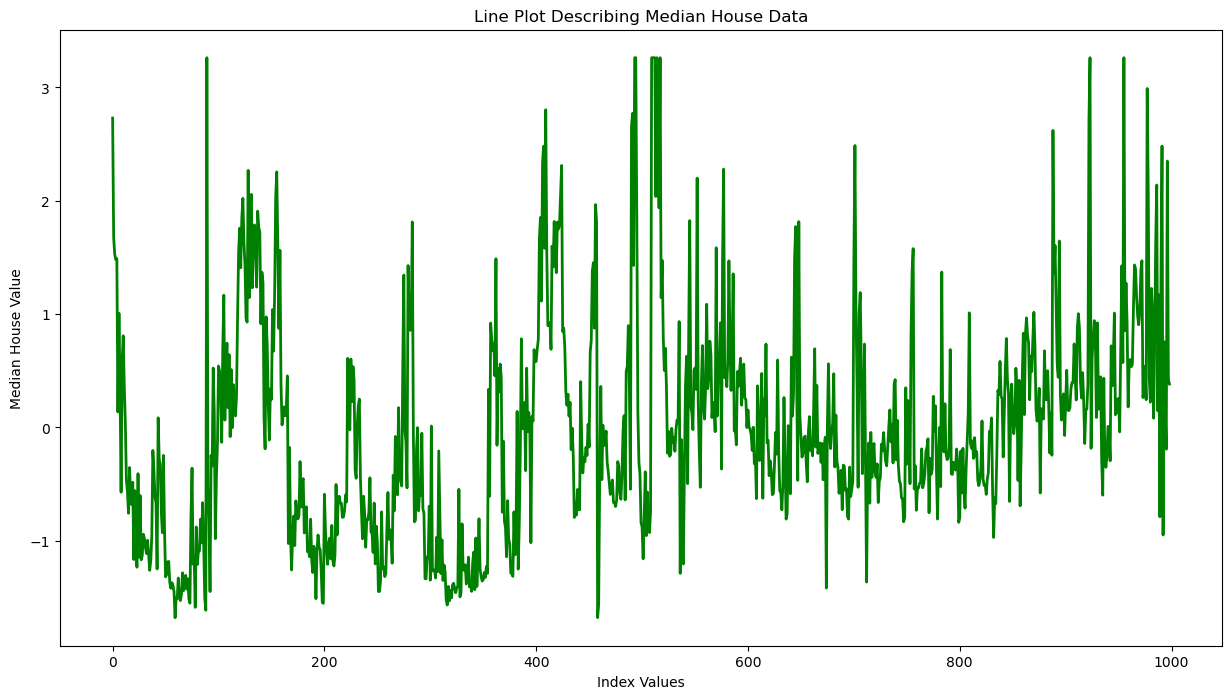

In [155]:
# Visualization - After Imputation

# Bar Plot for Missing Values in each column
plt.figure(figsize=(15, 8))
sns.heatmap(data1.isnull(), cmap='viridis', cbar_kws={'ticks': [0, 1]}, vmin=0, vmax=1)
plt.title('Heat Map Describing Missing Data')
plt.xlabel('Dataset Columns')
plt.ylabel('Observation/Index values')
plt.show()

# Line Plot for Missing Values Column
plt.figure(figsize=(15, 8))
plt.plot(data1['median_house_value'], label='Median House Value', linewidth=2, color = 'Green')
plt.xlabel('Index Values')
plt.ylabel('Median House Value')
plt.title('Line Plot Describing Median House Data')
plt.show()